# Laboratory exercise 4

## Warm-Up Mode (2 points)

**Task Description**  
Using the given dataset, develop and implement **3** different neural networks to predict the **air quality level**. Each network should differ in the following ways:  

- **layer configurations** - use different numbers and types of layers;
- **activation functions** - try different activation functions;
- **neurons per layer** - experiment with different numbers of neurons in each layer; and
- **number of layers** - build networks with varying depths.

After developing the models, evaluate and compare the performance of all **3** approaches.

**About the Dataset**  
This dataset focuses on air quality assessment across various regions. The dataset contains 5,000 samples and captures critical environmental and demographic factors that influence pollution levels.

**Features**:  
- **Temperature (°C)**: Average temperature of the region.  
- **Humidity (%)**: Relative humidity recorded in the region.  
- **PM2.5 Concentration (µg/m³)**: Levels of fine particulate matter.  
- **PM10 Concentration (µg/m³)**: Levels of coarse particulate matter.  
- **NO2 Concentration (ppb)**: Nitrogen dioxide levels.  
- **SO2 Concentration (ppb)**: Sulfur dioxide levels.  
- **CO Concentration (ppm)**: Carbon monoxide levels.  
- **Proximity to Industrial Areas (km)**: Distance to the nearest industrial zone.  
- **Population Density (people/km²)**: Number of people per square kilometer in the region.  

**Target Variable**: **Air Quality**  
- **Good**: Clean air with low pollution levels.  
- **Moderate**: Acceptable air quality but with some pollutants present.  
- **Poor**: Noticeable pollution that may cause health issues for sensitive groups.  
- **Hazardous**: Highly polluted air posing serious health risks to the population.  

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/pollution_dataset.csv')
data

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good
...,...,...,...,...,...,...,...,...,...,...
4995,40.6,74.1,116.0,126.7,45.5,25.7,2.11,2.8,765,Hazardous
4996,28.1,96.9,6.9,25.0,25.3,10.8,1.54,5.7,709,Moderate
4997,25.9,78.2,14.2,22.1,34.8,7.8,1.63,9.6,379,Moderate
4998,25.3,44.4,21.4,29.0,23.7,5.7,0.89,11.6,241,Good


In [ ]:
data.isnull().sum()


,0
Temperature,0
Humidity,0
PM2.5,0
PM10,0
NO2,0
SO2,0
CO,0
Proximity_to_Industrial_Areas,0
Population_Density,0
Air Quality,0


In [ ]:
data['Air Quality'].value_counts()

,count
Air Quality,
Good,2000
Moderate,1500
Poor,1000
Hazardous,500


<Axes: xlabel='Air Quality', ylabel='count'>

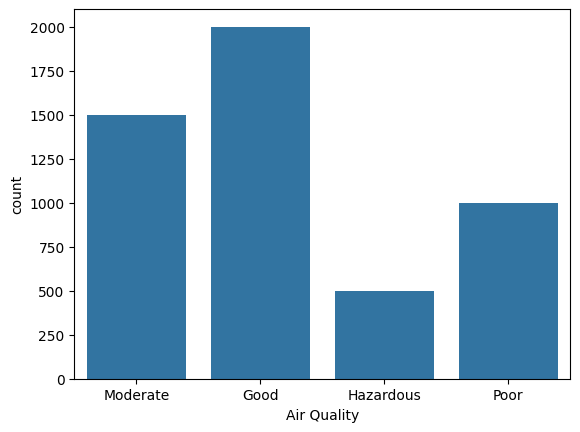

In [ ]:
sns.countplot(data, x='Air Quality')


In [ ]:
enc = LabelEncoder()
data['Air Quality'] = enc.fit_transform(data['Air Quality'])

In [ ]:
X = data.drop('Air Quality', axis=1)
y = data['Air Quality']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X.shape[1]

9

In [ ]:
model_1 = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(32, kernel_initializer="uniform", activation="relu"),
    Dense(16, kernel_initializer="uniform", activation="relu"),
    Dense(4, kernel_initializer="uniform", activation="softmax"),
])

model_1.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

history_1 = model_1.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4883 - loss: 1.3270 - val_accuracy: 0.6463 - val_loss: 0.7918
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6816 - loss: 0.7064 - val_accuracy: 0.8175 - val_loss: 0.5473
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8261 - loss: 0.4914 - val_accuracy: 0.9038 - val_loss: 0.3574
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8907 - loss: 0.3472 - val_accuracy: 0.9250 - val_loss: 0.2760
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8962 - loss: 0.2822 - val_accuracy: 0.9337 - val_loss: 0.2284
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9172 - loss: 0.2277 - val_accuracy: 0.9350 - val_loss: 0.2001
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9270 - loss: 0.1921 - val_accuracy: 0.9362 - val_loss: 0.1887
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9271 - loss: 0.1888 - val_accuracy: 0.

In [ ]:
model_2 = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, kernel_initializer="uniform", activation="tanh"),
    Dense(32, kernel_initializer="uniform", activation="relu"),
    Dense(16, kernel_initializer="uniform", activation="relu"),
    Dense(4, kernel_initializer="uniform", activation="softmax"),
])

model_2.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

history_2 = model_2.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4744 - loss: 1.2456 - val_accuracy: 0.6338 - val_loss: 0.7035
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6517 - loss: 0.6802 - val_accuracy: 0.7613 - val_loss: 0.6093
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7049 - loss: 0.6011 - val_accuracy: 0.7387 - val_loss: 0.5368
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7966 - loss: 0.5069 - val_accuracy: 0.8813 - val_loss: 0.4022
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9116 - loss: 0.3252 - val_accuracy: 0.9075 - val_loss: 0.2350
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9306 - loss: 0.2058 - val_accuracy: 0.9350 - val_loss: 0.1645
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9339 - loss: 0.1655 - val_accuracy: 0.9325 - val_loss: 0.1655
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9360 - loss: 0.1756 - val_accuracy: 0.

In [ ]:
model_3 = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, kernel_initializer="uniform", activation="relu"),
    Dense(64, kernel_initializer="uniform", activation="relu"),
    Dense(32, kernel_initializer="uniform", activation="relu"),
    Dense(16, kernel_initializer="uniform", activation="relu"),
    Dense(4, kernel_initializer="uniform", activation="softmax"),
])

model_3.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

history_3 = model_3.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 45s 5ms/step - accuracy: 0.4305 - loss: 1.2611 - val_accuracy: 0.6525 - val_loss: 0.6563
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7074 - loss: 0.5904 - val_accuracy: 0.8612 - val_loss: 0.3454
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8575 - loss: 0.3159 - val_accuracy: 0.9262 - val_loss: 0.1968
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9192 - loss: 0.2075 - val_accuracy: 0.9300 - val_loss: 0.1793
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9269 - loss: 0.1733 - val_accuracy: 0.9337 - val_loss: 0.1638
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9461 - loss: 0.1399 - val_accuracy: 0.9375 - val_loss: 0.1546
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9357 - loss: 0.1566 - val_accuracy: 0.9362 - val_loss: 0.1761
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9367 - loss: 0.1541 - val_accuracy: 0

In [ ]:
print("Model 1 Performance")
model_1_eval = model_1.evaluate(X_test, y_test, verbose=0)
print(f"Accuracy: {model_1_eval[1]:.2f}")


Model 1 Performance
Accuracy: 0.94


In [ ]:
print("Model 2 Performance")
model_2_eval = model_2.evaluate(X_test, y_test, verbose=0)
print(f"Accuracy: {model_2_eval[1]:.2f}")

Model 2 Performance
Accuracy: 0.95


In [ ]:

print("Model 3 Performance")
model_3_eval = model_3.evaluate(X_test, y_test, verbose=0)
print(f"Accuracy: {model_3_eval[1]:.2f}")

Model 3 Performance
Accuracy: 0.94


<Axes: >

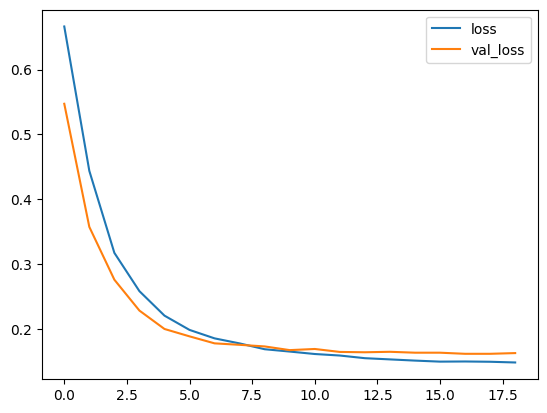

In [ ]:
sns.lineplot(history_1.history['loss'][1:], label='loss')
sns.lineplot(history_1.history['val_loss'][1:], label='val_loss')

<Axes: >

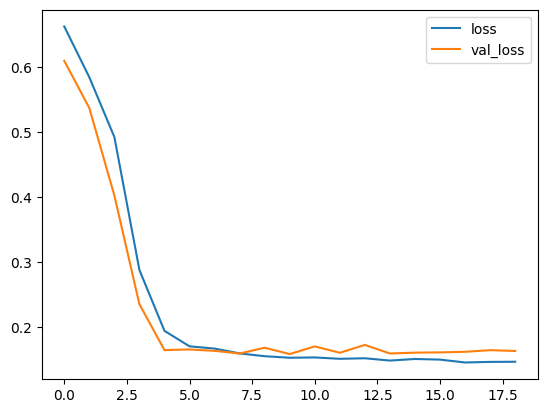

In [ ]:
sns.lineplot(history_2.history['loss'][1:], label='loss')
sns.lineplot(history_2.history['val_loss'][1:], label='val_loss')

<Axes: >

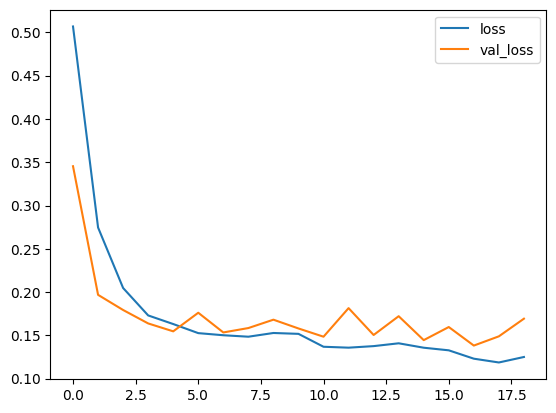

In [ ]:
sns.lineplot(history_3.history['loss'][1:], label='loss')
sns.lineplot(history_3.history['val_loss'][1:], label='val_loss')

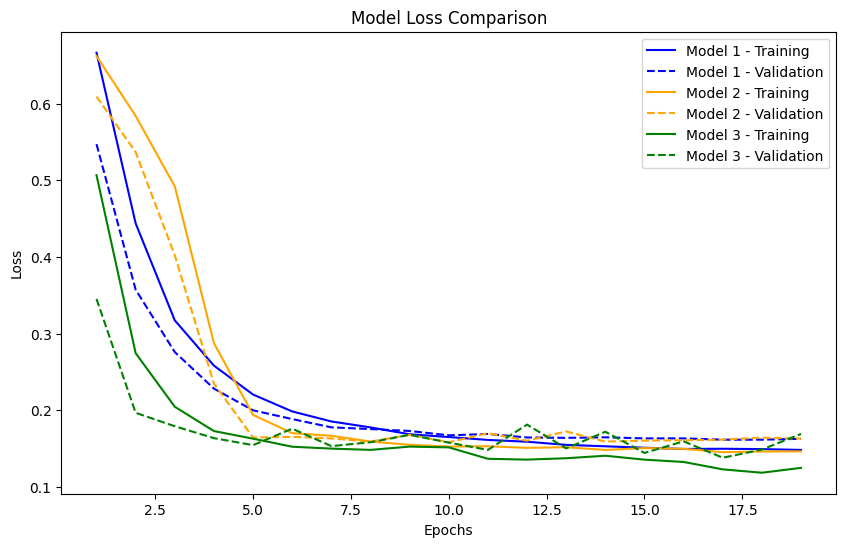

In [ ]:
histories = [history_1, history_2, history_3]
labels = ['Model 1', 'Model 2', 'Model 3']
colors = ['blue', 'orange', 'green']

plt.figure(figsize=(10, 6))

for index, (history, label) in enumerate(zip(histories, labels)):
    color = colors[index % len(colors)]
    sns.lineplot(x=range(1, len(history.history['loss'])),
                 y=history.history['loss'][1:],
                 label=f'{label} - Training', color=color)
    sns.lineplot(x=range(1, len(history.history['val_loss'])),
                 y=history.history['val_loss'][1:],
                 label=f'{label} - Validation', linestyle='dashed', color=color)

plt.title('Model Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Model 3 is the best because it achieves the lowest loss values.

** It shows slight overfitting, but the gap between training and validation loss is small and not alarming.